# Pre-Lab

## Libraries

Make sure you can run successfully import all these libraries.

In [2]:
# Imports; make sure you can run these before lab on March 14th
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy.signal import butter,filtfilt,lfilter
from scipy.fft import fft, fftfreq
from scipy import signal
from glob import glob
import gzip

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
import matplotlib.pyplot as plt

## Load and plot data

You are given .dat file, which is generated by Matlab. To facilitate data processing, we give you the data loading script. 

In the data directory, each sample is a 20-second recording. The file name is the starting time stamp of this sample. 

In [3]:
# takes in the data directory and a time_stamp string
# return a dataframe with time as index, then x, y and z accelerometer
def load_acc(sample_path):
    data = np.loadtxt(open(sample_path))
    x_raw = data[:, 1]
    y_raw = data[:, 2]
    z_raw = data[:, 3]
    time = data[:, 0]

    df = pd.DataFrame({'index': time,
                            'x_raw': x_raw,
                            'y_raw': y_raw,
                            'z_raw': z_raw})

    df = df.set_index('index')
    
    return df

# Plot the x, y, and z signals in a dataframe 
def plot_3_axis(df): 
    df.plot(subplots=True,
          layout=(3, 1),
          sharex=False,
          sharey=False,
          colormap='viridis',
         fontsize=14,
         legend=True,
         linewidth=1);
    plt.tight_layout();

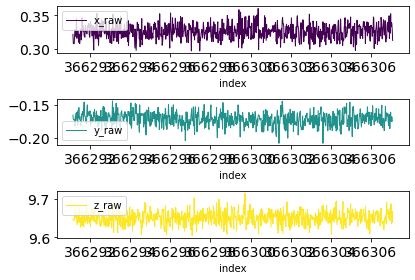

In [4]:
## Try yourself to plot your sample accelerometer. 
## Set the data_dir to be the directory for the lab subject. 
data_dir = "data"

sample_list = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
plot_3_axis(load_acc(data_dir + '/' + sample_list[0]))